In [ ]:
!ls /content/drive/MyDrive/CV\ project/data/image

origin.7z.001  origin.7z.003  origin.7z.005  origin.7z.007
origin.7z.002  origin.7z.004  origin.7z.006  origin.7z.008


In [ ]:
 #!7za -y x "/content/drive/MyDrive/CV project/data/image/origin.7z.*"

In [ ]:
 #!cp -r ./origin "/content/drive/MyDrive/CV project"

In [ ]:
from google.colab import drive

# Mount your Google Drive. You will be prompted to authorize access.
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
label_file_path=r"/content/drive/MyDrive/CV project/data/label/label.lst"
images_folder_path=r"/content/drive/MyDrive/CV project/data/image"

In [ ]:
from numpy import split
import pandas as pd
df_info = pd.read_csv(label_file_path,sep=" ",header=None)
col_names="image_name face_id_in_image face_box_top face_box_left face_box_right face_box_bottom face_box_confidence expression_label".split()
df_info.columns = col_names

df_info

,image_name,face_id_in_image,face_box_top,face_box_left,face_box_right,face_box_bottom,face_box_confidence,expression_label
0,angry_actor_104.jpg,0,28,113,226,141,22.9362,0
1,angry_actor_109.jpg,0,31,157,345,219,50.3056,0
2,angry_actor_120.jpg,1,53,53,372,372,13.9434,2
3,angry_actor_13.jpg,0,77,51,362,388,85.8104,3
4,angry_actor_132.jpg,0,95,31,412,476,82.3948,0
...,...,...,...,...,...,...,...,...
91788,surprised_expression_546.jpg,0,70,70,351,351,37.7117,5
91789,surprised_expression_381.jpg,0,51,61,117,107,91.6307,5
91790,surprised_expression_395.jpg,0,27,95,258,190,96.2861,5
91791,ecstatic_asian_31.jpg,0,60,136,184,108,39.9223,3


In [ ]:
df_sel=df_info[df_info.face_box_confidence > 40]

In [ ]:
df_sel.shape

(57931, 8)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder


In [ ]:
from numpy.core.fromnumeric import resize
import cv2
import matplotlib.pyplot as plt
import os


image_directory = '/content/drive/MyDrive/CV project/origin'
cropped_directory = '/content/drive/MyDrive/CV project/cropped'


x = []
y = []
for i, row in df_sel.sample(3500).iterrows():
    img_name = row["image_name"]
    x1 = row["face_box_left"]
    x2 = row["face_box_right"]
    y1 = row["face_box_top"]
    y2 = row["face_box_bottom"]
    label = row["expression_label"]
    img_path = os.path.join(image_directory, img_name)
    img = cv2.imread(img_path)
    # Check if img is not None
    if img is not None:
    #     # Crop the image using the provided coordinates
         cropped_img = img[y1:y2, x1:x2]
    else:
        continue

    if cropped_img is not None:
      resized_face = cv2.resize(cropped_img , ( 64,64))
    else:
      continue

    x.append(resized_face)
    y.append(label)

In [ ]:
import numpy as np
X=np.array(x)
Y=np.array(y)


In [ ]:
X

array([[[[138, 127, 117],
         [ 81,  73,  65],
         [ 65,  61,  55],
         ...,
         [ 82, 201, 200],
         [ 83, 203, 202],
         [ 81, 203, 202]],

        [[121, 109,  99],
         [ 81,  71,  64],
         [ 80,  74,  69],
         ...,
         [ 32, 152, 150],
         [ 33, 153, 152],
         [ 31, 154, 152]],

        [[ 98,  86,  77],
         [ 74,  64,  56],
         [ 83,  76,  71],
         ...,
         [ 20, 139, 138],
         [ 18, 138, 137],
         [ 16, 138, 136]],

        ...,

        [[168, 177, 187],
         [164, 172, 182],
         [171, 180, 189],
         ...,
         [ 82, 167, 149],
         [ 81, 173, 154],
         [ 82, 180, 160]],

        [[161, 170, 181],
         [161, 171, 181],
         [167, 177, 187],
         ...,
         [ 88, 165, 148],
         [ 87, 171, 152],
         [ 85, 178, 157]],

        [[168, 176, 189],
         [156, 166, 176],
         [157, 167, 177],
         ...,
         [106, 168, 152],
        

In [ ]:
Y

array([2, 3, 3, ..., 3, 6, 6])

In [ ]:
X.shape

(3346, 64, 64, 3)

In [ ]:
Y.shape

(3346,)

In [ ]:
normalized_X=X/255.0

In [ ]:
X_new=X.reshape(-1,64*64*3)

In [ ]:
import pandas as pd
pd.Series(Y).value_counts()

3    1222
6    1152
4     349
5     248
1     174
0     164
2      37
dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
sampler= SMOTE()
X_smote,Y_smote=sampler.fit_resample(X_new,Y)

In [ ]:
pd.Series(Y_smote).value_counts()

2    1222
3    1222
6    1222
4    1222
5    1222
1    1222
0    1222
dtype: int64

In [ ]:
X=X_smote.reshape(-1,64,64,3)

In [ ]:
import numpy as np
from keras.utils import to_categorical
onehot_encoded_y = to_categorical(Y)

print(onehot_encoded_y)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Split the data into training (70%), testing (15%), and validation (15%) sets
X_train, X_temp, Y_train, Y_temp = train_test_split(normalized_X, onehot_encoded_y, test_size=0.3, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)


print("Training set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Testing set size:",len(X_test))

Training set size: 2342
Validation set size: 502
Testing set size: 502


In [ ]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
     rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)

augmented_data_generator = datagen.flow(X_train, Y_train,batch_size=32)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping

def resize_images(images):
    return tf.image.resize(images, (96, 96))

X_train_resized = resize_images(X_train)
X_val_resized = resize_images(X_val)
X_test_resized = resize_images(X_test)

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train_resized)

# learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(96, 96, 3))

# custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(7, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers[:-10]:  # Fine-tune the last 10 layers
    layer.trainable = False

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

early_stop = EarlyStopping(patience=5, restore_best_weights=True)

# Train the model on the augmented data generator
history = model.fit(datagen.flow(X_train_resized, Y_train, batch_size=64), epochs=25, validation_data=(X_val_resized, Y_val), callbacks=[early_stop])

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test_resized, Y_test, verbose=0)
print("Test Accuracy:", test_accuracy)

# Save the model
model.save('/content/drive/MyDrive/CV_project.h5')


58889256/58889256 [==============================] - 1s 0us/step
Epoch 1/25
37/37 [==============================] - 789s 21s/step - loss: 1.6013 - accuracy: 0.3646 - val_loss: 1.5355 - val_accuracy: 0.4064
Epoch 2/25
37/37 [==============================] - 784s 21s/step - loss: 1.5386 - accuracy: 0.3578 - val_loss: 1.4735 - val_accuracy: 0.4243
Epoch 3/25
37/37 [==============================] - 776s 21s/step - loss: 1.4857 - accuracy: 0.4291 - val_loss: 1.4264 - val_accuracy: 0.4960
Epoch 4/25
37/37 [==============================] - 783s 21s/step - loss: 1.3986 - accuracy: 0.4927 - val_loss: 1.3666 - val_accuracy: 0.4602
Epoch 5/25
37/37 [==============================] - 749s 20s/step - loss: 1.3379 - accuracy: 0.5226 - val_loss: 1.2885 - val_accuracy: 0.5378
Epoch 6/25
37/37 [==============================] - 749s 20s/step - loss: 1.2604 - accuracy: 0.5705 - val_loss: 1.2234 - val_accuracy: 0.5857
Epoch 7/25
37/37 [==============================] - 776s 21s/step - loss: 1.2084 - 

16/16 [==============================] - 80s 5s/step


<Figure size 800x600 with 0 Axes>

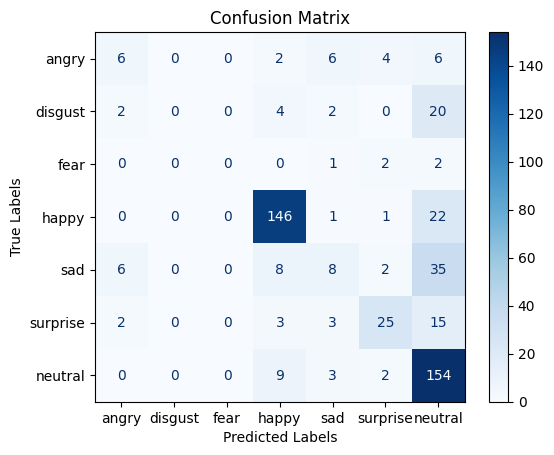

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from tensorflow.keras.models import load_model

# Load the model
model = load_model('/content/drive/MyDrive/CV_project.h5')

y_pred = model.predict(X_test_resized)

y_pred_labels = np.argmax(y_pred, axis=1)
Y_test_labels = np.argmax(Y_test, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(Y_test_labels, y_pred_labels)

class_labels = ["angry", "disgust", "fear", "happy", "sad", "surprise", "neutral"]

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
